In [298]:
import keras
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import utils as np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [299]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

In [300]:
print(X_treinamento.shape, X_teste.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


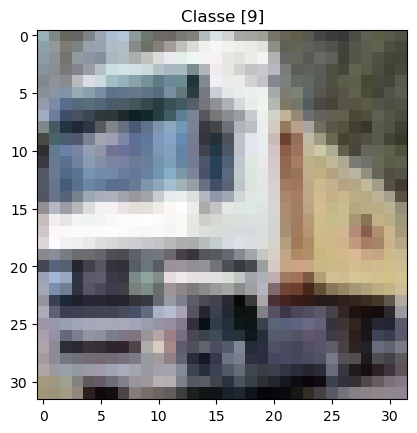

In [301]:
plt.imshow(X_treinamento[1])
plt.title('Classe ' + str(y_treinamento[1]))
plt.show()

In [302]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_treinamento /= 255
X_teste /= 255

In [303]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [304]:
datagen = ImageDataGenerator(
    rotation_range=20,       
    width_shift_range=0.2,   
    height_shift_range=0.2,  
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True,    
    fill_mode='nearest'      
)

datagen.fit(X_treinamento)

In [305]:
#construindo a rede neural convolucional
rede_neural = Sequential()
rede_neural.add(InputLayer(input_shape=(32, 32, 3)))
rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())
rede_neural.add(Dense(units=128, activation='relu',))
rede_neural.add(Dropout(0.5))
rede_neural.add(Dense(units=10, activation='softmax'))

In [306]:
print(rede_neural.summary())

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,578 (146.79 KB)

 Trainable params: 37,386 (146.04 KB)

 Non-trainable params: 192 (768.00 B)

None


In [307]:
#treinando a rede
from tensorflow.keras.optimizers import Adam
rede_neural.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
rede_neural.fit(X_treinamento, y_treinamento, batch_size=128, epochs=10,
                validation_data=(X_teste, y_teste))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.2949 - loss: 2.0669 - val_accuracy: 0.3102 - val_loss: 1.9479
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5063 - loss: 1.3755 - val_accuracy: 0.4754 - val_loss: 1.5169
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.5683 - loss: 1.2095 - val_accuracy: 0.5838 - val_loss: 1.1663
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6092 - loss: 1.1022 - val_accuracy: 0.5397 - val_loss: 1.3771
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6402 - loss: 1.0233 - val_accuracy: 0.6449 - val_loss: 0.9991
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6609 - loss: 0.9659 - val_accuracy: 0.6590 - val_loss: 0.9612
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6781 - loss: 0.9098 - val_accuracy: 0.6408 - val_loss: 1.0324
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6907 - loss: 0.8914 - 

In [308]:
#acurácia na base de teste
score = rede_neural.evaluate(X_teste, y_teste, verbose=0)
print("Acurácia na base de teste: %.2f%%" % (score[1] * 100))

Acurácia na base de teste: 67.41%
